# Project :Network traffic analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

## Join different network traffic

In [2]:
# Define la ruta de los archivos CSV en crudo
raw_data_path = r"../Dataset en Crudo"

# Busca todos los archivos CSV en la ruta
csv_files = [f for f in os.listdir(raw_data_path) if f.endswith('.csv')]

# Crea una lista vacía para almacenar los DataFrames
dataframes = []

# Itera sobre cada archivo CSV y agrega su DataFrame a la lista
for csv_file in csv_files:
    file_path = os.path.join(raw_data_path, csv_file)
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    dataframes.append(df)

# Concatena todos los DataFrames en uno solo
final_df = pd.concat(dataframes, ignore_index=True)

# Define la ruta y el nombre del archivo final
output_path = r"../Dataset Crudo Proceso de Clasificación/output.csv"

# Guarda el archivo final en la ruta especificada
final_df.to_csv(output_path, index=False)

print("Archivo final guardado en: ", output_path)

Archivo final guardado en:  ../Dataset Crudo Proceso de Clasificación/output.csv


# Data traffic dataset

In [3]:
#read dataset and load it into dataframe
data = r"../Dataset Crudo Proceso de Clasificación/output.csv"
df = pd.read_csv(data, delimiter=',')

# Exploratory analysis of the dataset

For the initial scan of the datset analysis, the rows and columns contained in the dataset are counted using the *"shape"* command.
After this, we start to arrange the dataset, for this the first thing to do is to eliminate the null data that we have, for this we use the command *"dropna"*.

In [5]:
#dataset dimension
shape = df.shape
print(f"Columns: {shape[1]}, Rows: {shape[0]}")

#Remove null data or clean the dataset of garbage elements
df = df.dropna()
print(f"Dataset dimension with no null or bad data \nColumns: {df.shape[1]}, Rows: {df.shape[0]}\n")

Columns: 7, Rows: 585462
Dataset dimension with no null or bad data 
Columns: 7, Rows: 585395



Now we review what is the information contained in the dataset using *"info"*, in this case it contains **585462 data** in 7 columns and these have a division as follows with different data types

*   No.          int64  
*   Time         float64
*   Source       object 
*   Destination  object
*   Protocol     object 
*   Length       int64  
*   Info         object 

In [6]:
#Data frame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585395 entries, 0 to 585461
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          585395 non-null  int64  
 1   Time         585395 non-null  float64
 2   Source       585395 non-null  object 
 3   Destination  585395 non-null  object 
 4   Protocol     585395 non-null  object 
 5   Length       585395 non-null  int64  
 6   Info         585395 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 35.7+ MB


In [7]:
# unique values of the 'Protocol' column in the DataFrame df.
print(f"Values of the 'Protocol' \n{df['Protocol'].unique()}")

Values of the 'Protocol' 
['ICMP' 'IPv4' 'DHCPv6' 'ICMPv6' 'ARP' 'DNS' 'TCP' 'SSLv3' 'HTTP' 'TELNET'
 'UDP' 'FTP' 'Messenger' 'MANOLITO' 'THRIFT' 'Gnutella' 'HTTP/XML'
 'IGMPv2' 'IGMPv1' 'RGMP' 'STP' 'CDP' 'Syslog' 'PPP LCP' 'L2TP' 'TLSv1'
 'OCSP' 'RADIUS' 'WSP' 'DHCP' 'PPPoED' 'PPP CHAP' 'PPP IPCP' 'PPP IPV6CP'
 'NTP' 'SIP' 'PPP PAP' 'SIP/SDP' 'RTP' 'Portmap' 'MOUNT' 'NFS' 'RPC'
 'PTPv2' 'SMB2' 'SMTP' 'SMTP/IMF' 'BROWSER' 'SNMP' 'UFTP' 'IGMPv3'
 'FTP-DATA' 'MDNS' 'TLSv1.2' 'SSDP' 'TLSv1.3' 'QUIC' 'HTTP/JSON'
 'PKIX-CRL' 'XMPP/XML' 'LLMNR' 'NNTP' 'SSL' 'SSLv2' 'NBNS']


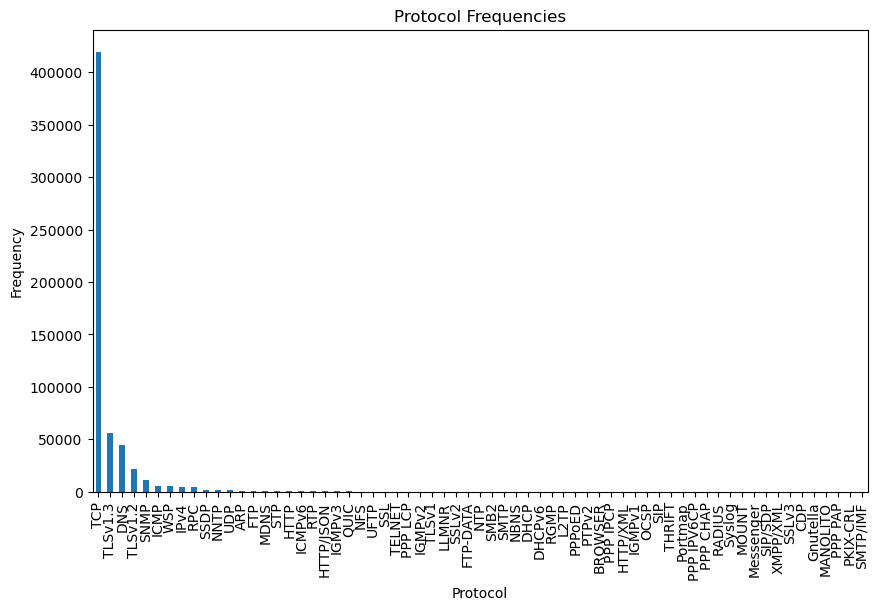

In [8]:
#Create a bar chart to show the frequency of each protocol in the data set

# Calculate the frequency of each protocol
protocol_freq = df['Protocol'].value_counts()

# Create a bar chart for the protocol frequencies
protocol_freq.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.title('Protocol Frequencies')
plt.show()

# Data transformation


In [9]:
# Define la ruta del archivo CSV y la carpeta para guardar los nuevos archivos
csv_path = r'../Dataset Crudo Proceso de Clasificación/output.csv'
folder_path = r'../Dataset Proceso de Clasificación'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Elimina la columna "No."
df = df.drop('No.', axis=1)

# Crea la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Crea un diccionario para almacenar los DataFrames de cada protocolo
protocol_dfs = {}

# Filtra los resultados del conteo por los protocolos de aplicación conocidos
app_protocols = ['HTTP', 'DNS', 'TCP', 'FTP', 'ICMP', 'UDP']
for protocol in app_protocols:
    # Verifica si hay suficientes filas en el DataFrame para el protocolo actual
    if (df['Protocol'] == protocol).sum() <= 700:
        data = (df['Protocol'] == protocol).sum()
        print(data)
        print(f"No hay suficientes filas para el protocolo {protocol}")
        continue
    
    # Selecciona 700 filas aleatorias del DataFrame para cada protocolo
    random.seed(42)
    protocol_df = df.loc[df['Protocol'] == protocol].sample(n=700, random_state=42)
    protocol_dfs[protocol] = protocol_df

# Guarda cada DataFrame en un archivo CSV separado
for protocol, protocol_df in protocol_dfs.items():
    filename = f'{protocol.lower()}_output.csv'
    file_path = os.path.join(folder_path, filename)
    protocol_df.to_csv(file_path, index=False)

# Dataset Consolidation

In [10]:
# Define la ruta de la carpeta que contiene los archivos CSV
folder_path = r'../Dataset Proceso de Clasificación'

# Crea una lista vacía para almacenar los DataFrames de cada archivo CSV
dfs = []

# Lee cada archivo CSV en un DataFrame y agrégalo a la lista
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatena los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Mezcla las filas del DataFrame de forma pseudoaleatoria
random.seed(42)
df = df.sample(frac=1).reset_index(drop=True)

# Guarda el DataFrame mezclado en un archivo CSV
mixed_csv_path = r'../Dataset Analisis de redes/dataset.csv'
df.to_csv(mixed_csv_path, index=False)

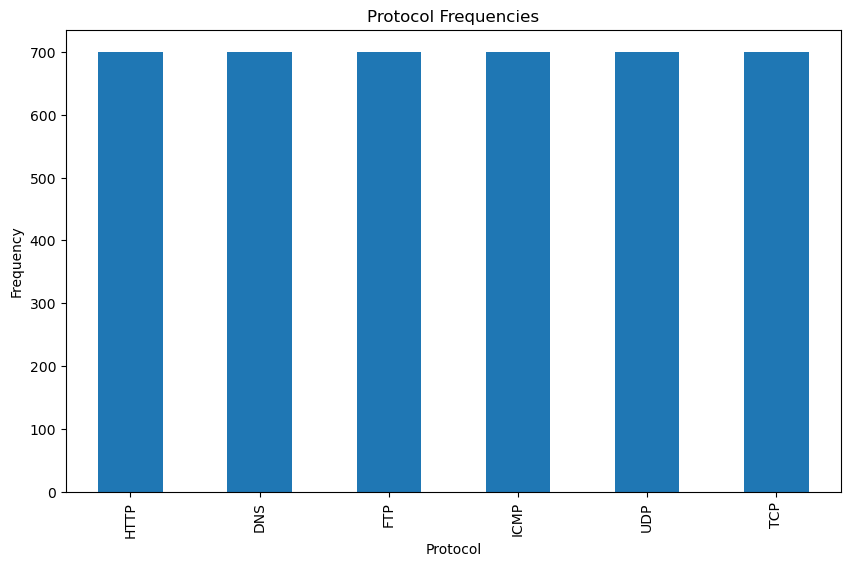

In [11]:
#Create a bar chart to show the frequency of each protocol in the data set

# Calculate the frequency of each protocol
protocol_freq = df['Protocol'].value_counts()

# Create a bar chart for the protocol frequencies
protocol_freq.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.title('Protocol Frequencies')
plt.show()


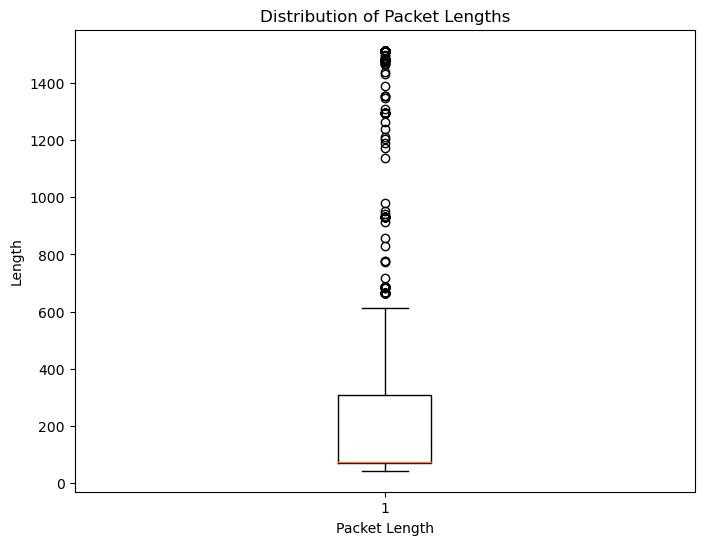

In [12]:
# Create a box plot of packet lengths
plt.figure(figsize=(8, 6))
plt.boxplot(df['Length'])
plt.xlabel('Packet Length')
plt.ylabel('Length')
plt.title('Distribution of Packet Lengths')
plt.show()

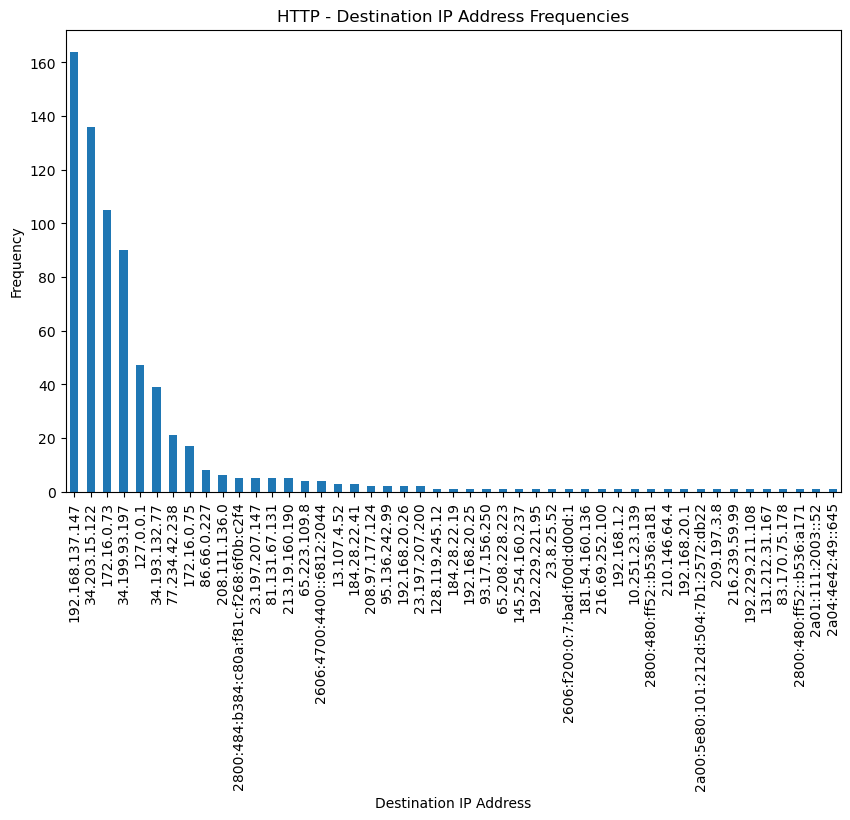

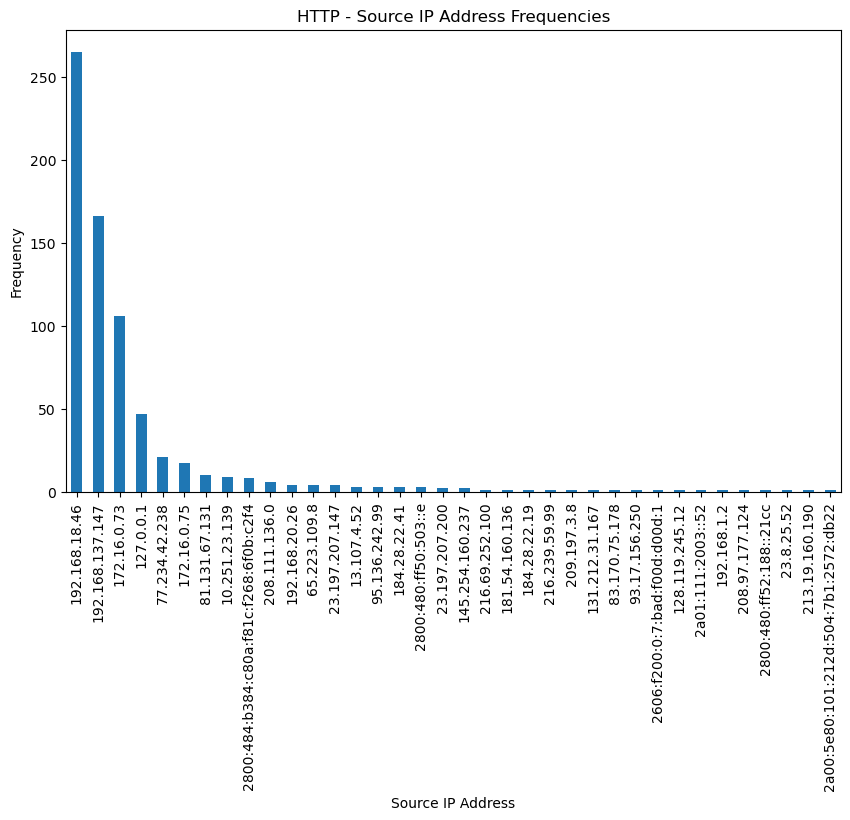

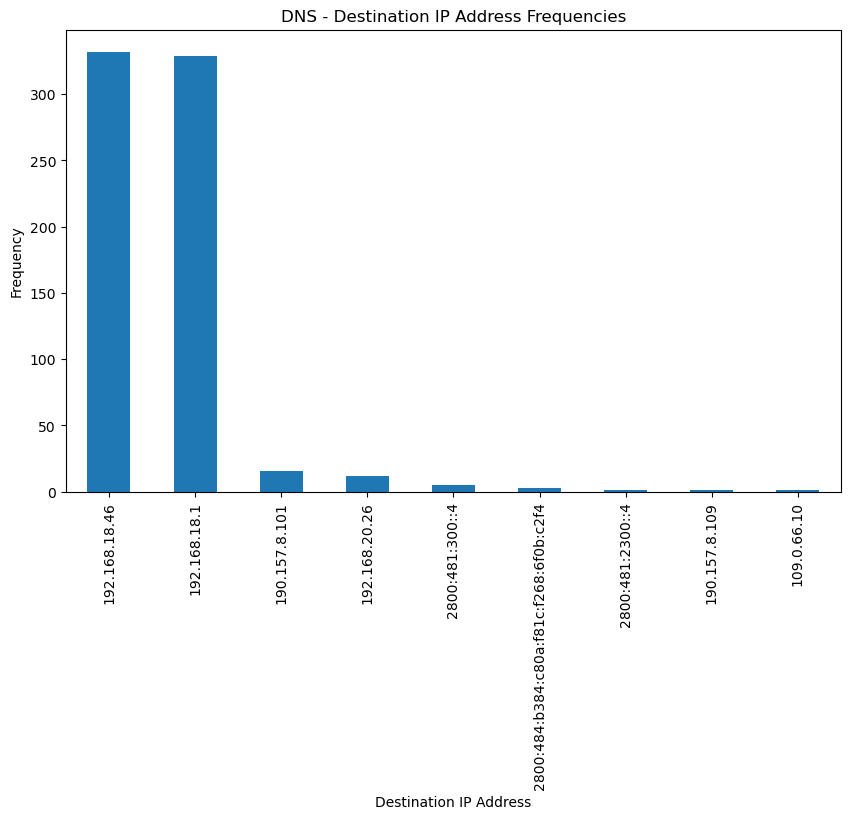

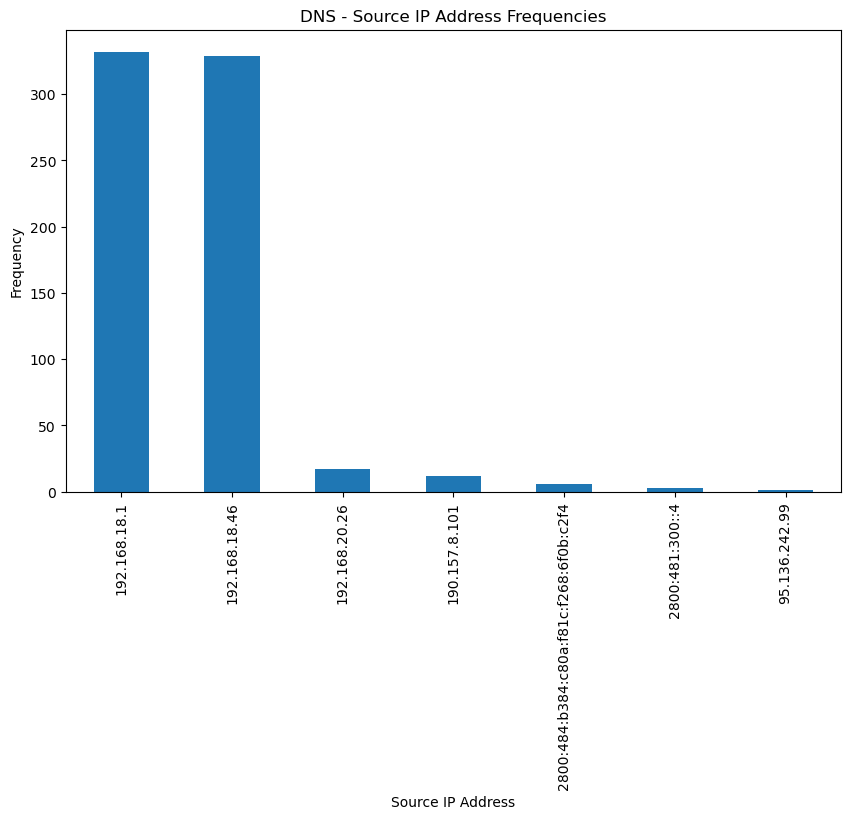

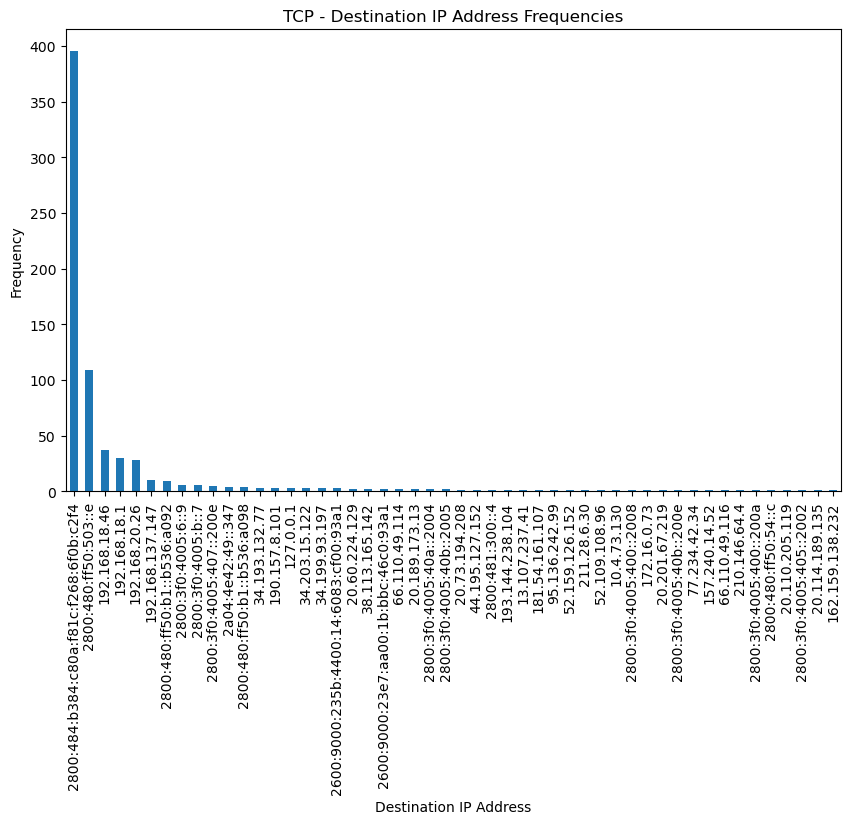

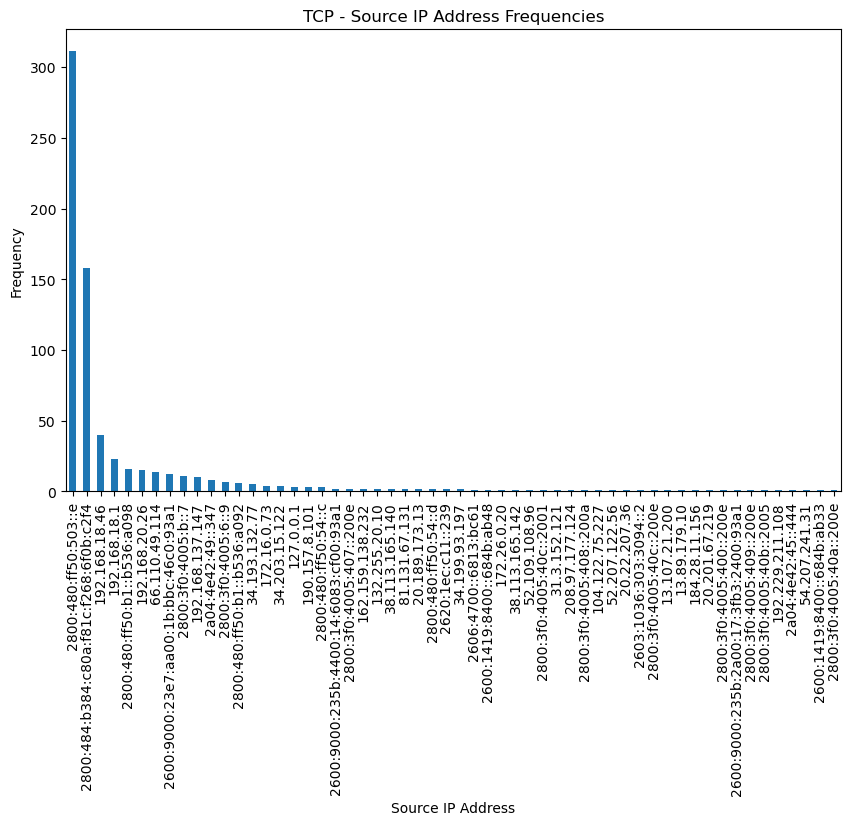

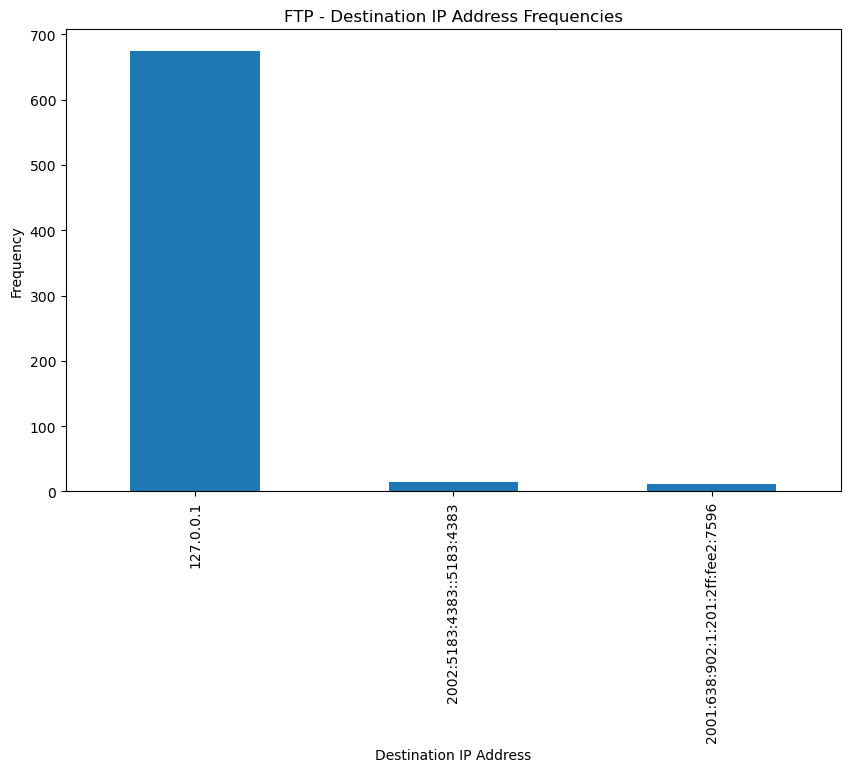

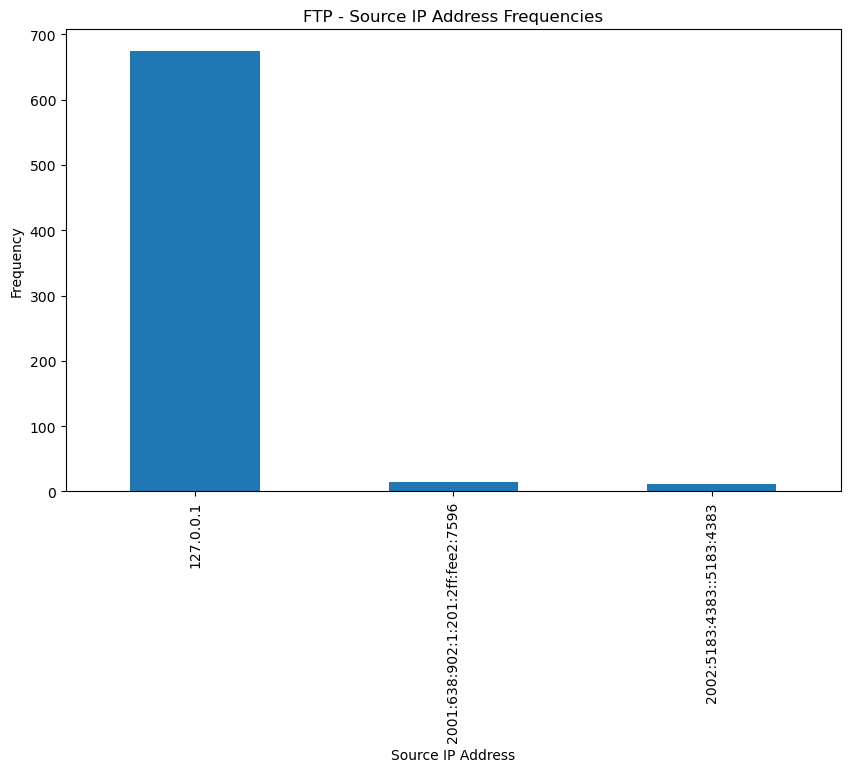

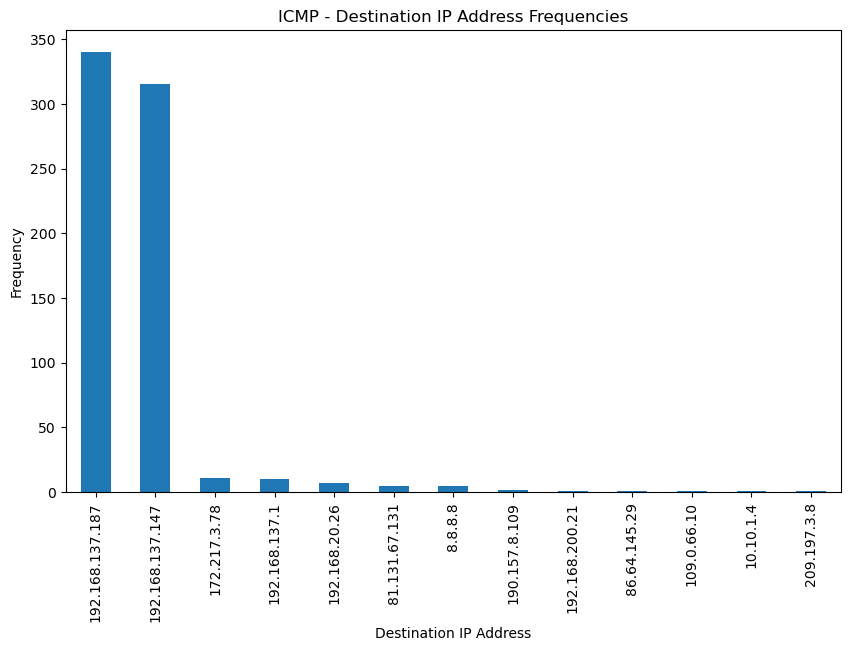

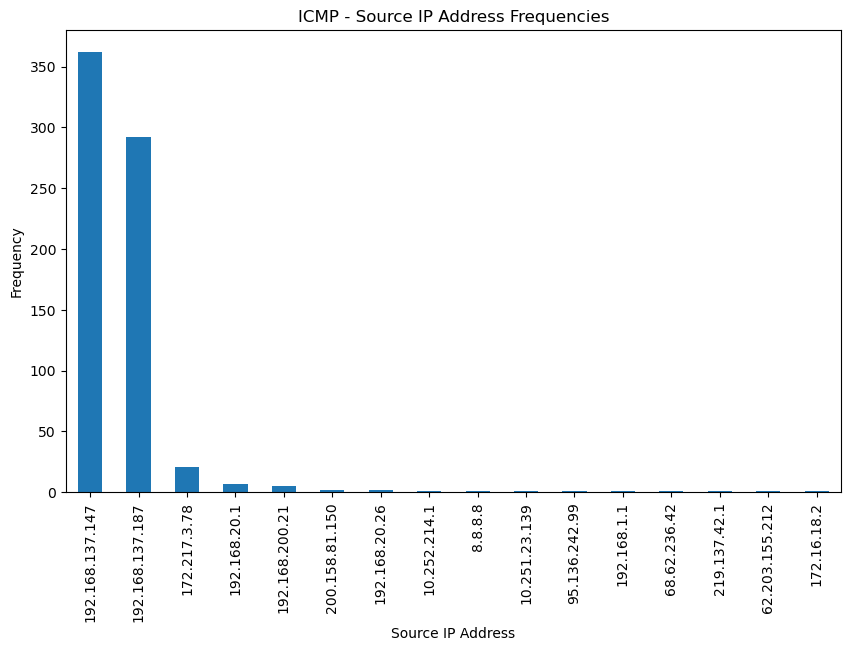

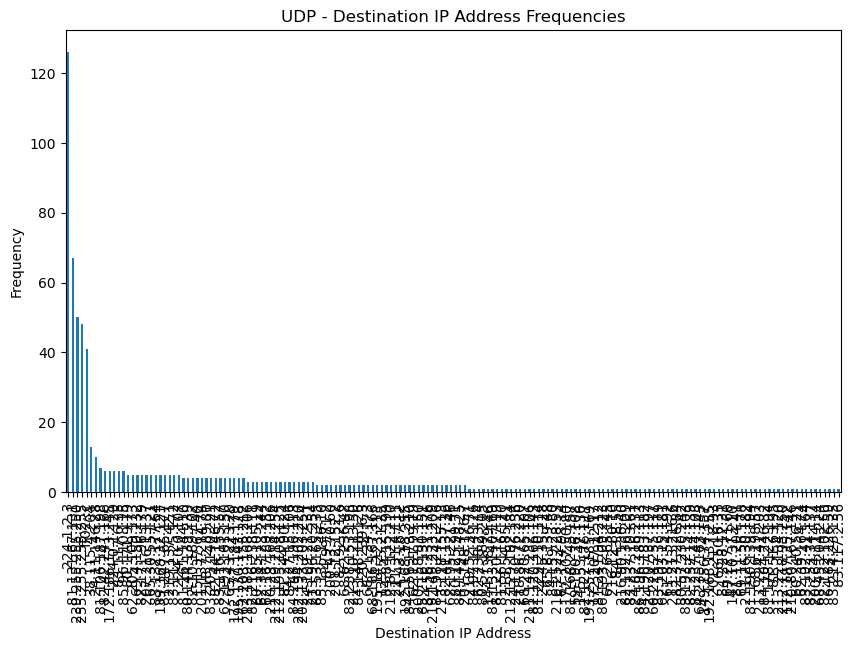

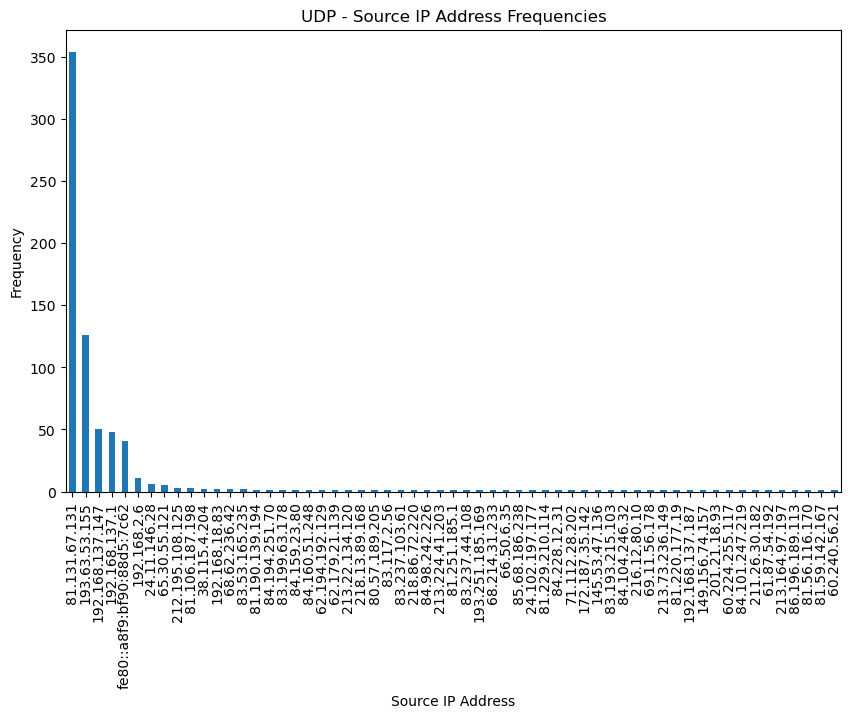

In [13]:
protocols = ['HTTP', 'DNS', 'TCP', 'FTP', 'ICMP', 'UDP']

for protocol in protocols:
    # Filter the DataFrame for the specific protocol
    protocol_df = df[df['Protocol'] == protocol]
    
    # Get the frequency of the destination IP addresses
    destination_freq = protocol_df['Destination'].value_counts()

    # Get the frequency of the source IP addresses
    source_freq = protocol_df['Source'].value_counts()

    # Create a bar chart for the destination IP address frequencies
    destination_freq.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Destination IP Address')
    plt.ylabel('Frequency')
    plt.title(f'{protocol} - Destination IP Address Frequencies')
    plt.show()

    # Create a bar chart for the source IP address frequencies
    source_freq.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Source IP Address')
    plt.ylabel('Frequency')
    plt.title(f'{protocol} - Source IP Address Frequencies')
    plt.show()